<a href="https://colab.research.google.com/github/123prashanth123/Fault-Detection-System/blob/main/Negative%20Image%20Maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

!pip install -q --upgrade imgaug
!pip install -q imagecorruptions

clear_output()

In [ ]:
import cv2
import torch
from torch import nn
from torchvision import models, transforms, ops
import matplotlib.pyplot as plt
import numpy as np
from imgaug import augmenters

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.model = models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
    
    def forward(self, x):
        return self.model(x)

model = Model()
model.eval()

clear_output()

In [ ]:
def BGR2RGB(image):
    return cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)

def resize(image):
    return cv2.resize(src=image, dsize=(224, 224), interpolation=cv2.INTER_AREA)

def show(image):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_bbox_coords(image):
    x1, y1, x2, y2 = None, None, None, None
    with torch.no_grad():
        output = model(transforms.ToTensor()(image).unsqueeze(dim=0))[0]
    cnts, scrs = output["boxes"], output["scores"]
    if len(cnts) != 0:
        cnts = ops.clip_boxes_to_image(cnts, (224, 224))
        best = ops.nms(cnts, scrs, 0.5)[0]
        x1, y1, x2, y2 = int(cnts[best][0]), int(cnts[best][1]), int(cnts[best][2]), int(cnts[best][3])
    return x1, y1, x2, y2

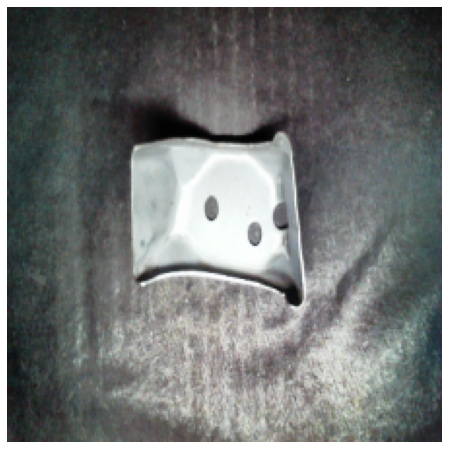

In [ ]:
image = resize(BGR2RGB(cv2.imread("/content/Snapshot_1.png", cv2.IMREAD_COLOR)))

show(image)

# Black

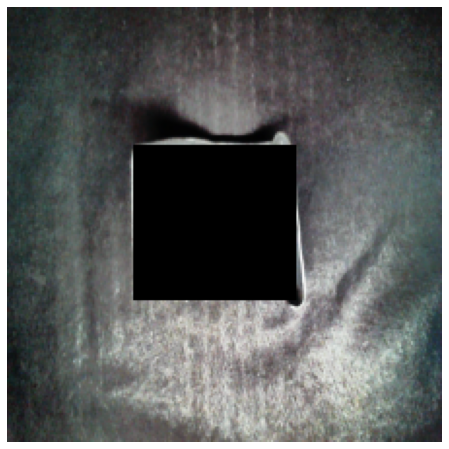

In [ ]:
c_image = image.copy()
x1, y1, x2, y2 = get_bbox_coords(c_image)
c_image[y1:y2, x1:x2, :] = 0
show(c_image)

# Imgaug

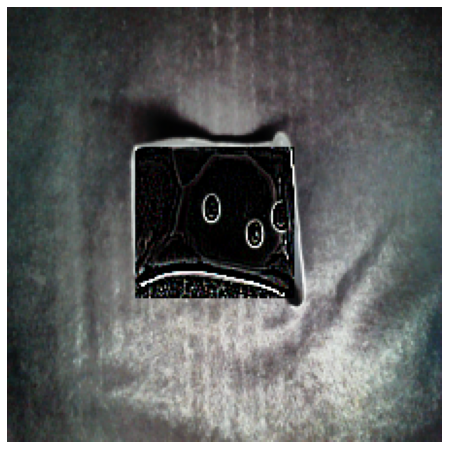

In [ ]:
c_image = image.copy()
x1, y1, x2, y2 = get_bbox_coords(c_image)
crp_img = c_image[y1:y2, x1:x2, :]

num_layers = 1

# augment = augmenters.Sequential([augmenters.imgcorruptlike.ShotNoise(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.ImpulseNoise(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.GaussianNoise(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.SpeckleNoise(severity=5, seed=0),] * num_layers)

# augment = augmenters.Sequential([augmenters.imgcorruptlike.GlassBlur(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.GaussianBlur(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.DefocusBlur(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.ZoomBlur(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.MotionBlur(severity=5, seed=0),] * num_layers)

# augment = augmenters.Sequential([augmenters.imgcorruptlike.Pixelate(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.JpegCompression(severity=5, seed=0),] * num_layers)

# augment = augmenters.Sequential([augmenters.imgcorruptlike.Fog(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.Frost(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.Snow(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.Spatter(severity=5, seed=0),] * num_layers)

# augment = augmenters.Sequential([augmenters.imgcorruptlike.Contrast(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.Saturate(severity=5, seed=0),] * num_layers)
# augment = augmenters.Sequential([augmenters.imgcorruptlike.Brightness(severity=5, seed=0),] * num_layers)

# augment = augmenters.pillike.FilterContour(seed=0)
augment = augmenters.pillike.FilterFindEdges(seed=0)

# augment = augmenters.Sequential([augmenters.imgcorruptlike.GlassBlur(severity=5, seed=0),
#                                  augmenters.imgcorruptlike.GaussianBlur(severity=5, seed=0),
#                                  augmenters.imgcorruptlike.Pixelate(severity=5, seed=0)])

crp_img = augment(images=np.expand_dims(crp_img, axis=0))[0]

c_image[y1:y2, x1:x2, :] = crp_img

show(c_image)

# Color of the First Pixel

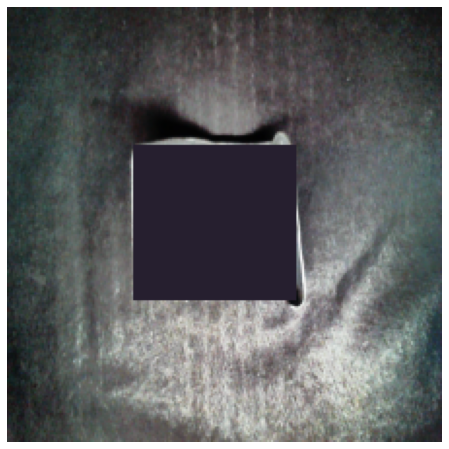

In [ ]:
c_image = image.copy()
x1, y1, x2, y2 = get_bbox_coords(c_image)
color = (c_image[0, 0, 0], c_image[0, 0, 1], c_image[0, 0, 2])
c_image[y1:y2, x1:x2, :] = color

show(c_image)

# Color of the Midpoint Pixel

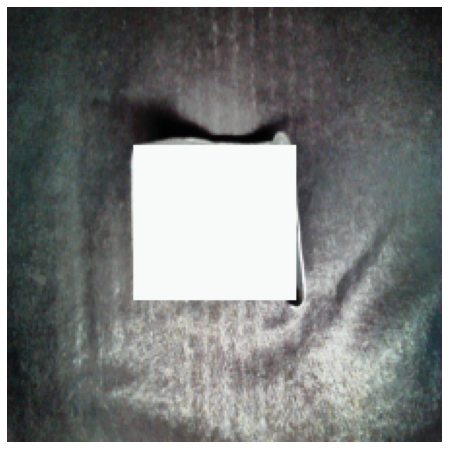

In [ ]:
c_image = image.copy()
x1, y1, x2, y2 = get_bbox_coords(c_image)
color = (c_image[112, 112, 0], c_image[112, 112, 1], c_image[112, 112, 2])
c_image[y1:y2, x1:x2, :] = color

show(c_image)

# Metallic Color

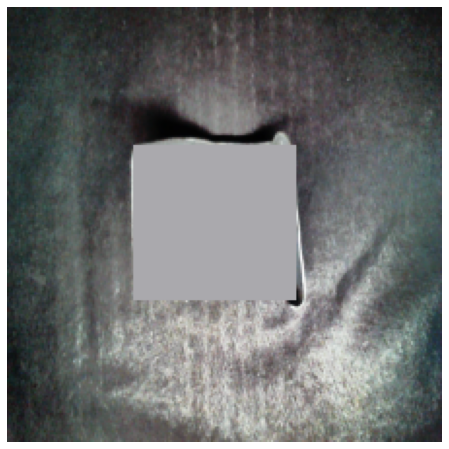

In [ ]:
c_image = image.copy()
x1, y1, x2, y2 = get_bbox_coords(c_image)
color = (170, 169, 173)
c_image[y1:y2, x1:x2, :] = color

show(c_image)

# Thresholded White

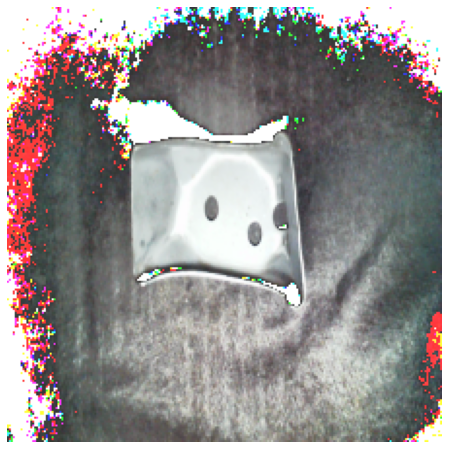

In [ ]:
c_image = image.copy()
color = 255
c_image[np.where(c_image <= 50)] = color

show(c_image)

# Thresholded Gray

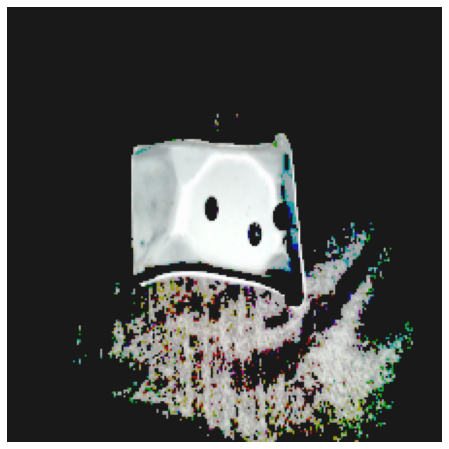

In [ ]:
c_image = image.copy()
color = 25
c_image[np.where(c_image <= 150)] = color

show(c_image)

# Thresholded Metallic

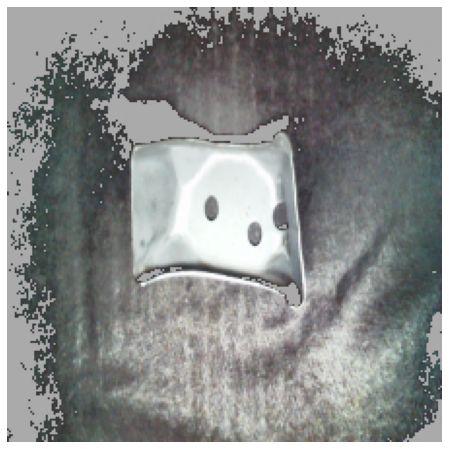

In [ ]:
c_image = image.copy()
color = (170, 169, 173)

c_image[np.where(c_image[:, :, 0] <= 50)] = color[0]
c_image[np.where(c_image[:, :, 1] <= 50)] = color[1]
c_image[np.where(c_image[:, :, 2] <= 50)] = color[2]

show(c_image)